In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import tensorflow as tf
# allow plots to appear directly in the notebook
%matplotlib inline

In [2]:
data = pd.read_csv("/content/Housing.csv")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [16]:
data["furnishingstatus"] = data["furnishingstatus"].replace({'furnished': 1, 'semi-furnished': 0,'unfurnished':2})
data["mainroad"] = data["mainroad"].replace({'yes': 1, 'no': 0})
data["guestroom"] = data["guestroom"].replace({'yes': 1, 'no': 0})
data["basement"] = data["basement"].replace({'yes': 1, 'no': 0})
data["hotwaterheating"] = data["hotwaterheating"].replace({'yes': 1, 'no': 0})
data["airconditioning"] = data["airconditioning"].replace({'yes': 1, 'no': 0})

data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,1


In [18]:
summary_stats = data.describe()
print(summary_stats)

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

         mainroad   guestroom    basement  hotwaterheating  airconditioning  \
count  545.000000  545.000000  545.000000       545.000000       545.000000   
mean     0.858716    0.177982    0.350459         0.045872         0.315596   
std      0.348635    0.382849    0.477552         0.209399         0.465180   
min      0.000000    0.000

In [19]:
avg_price_with_ac = data[data['airconditioning'] == 1]['price'].mean()
avg_price_without_ac = data[data['airconditioning'] == 0]['price'].mean()

print("Average Price with Air Conditioning:", avg_price_with_ac)
print("Average Price without Air Conditioning:", avg_price_without_ac)


Average Price with Air Conditioning: 6013220.5813953485
Average Price without Air Conditioning: 4191939.678284182


In [20]:
num_houses_with_basement = data['basement'].sum()
print("Number of Houses with Basements:", num_houses_with_basement)


Number of Houses with Basements: 191


In [21]:
avg_area_by_furnishing = data.groupby('furnishingstatus')['area'].mean()
print("Average Area by Furnishing Status:")
print(avg_area_by_furnishing)

Average Area by Furnishing Status:
furnishingstatus
0    5166.339207
1    5688.100000
2    4707.595506
Name: area, dtype: float64


In [22]:
proportion_with_guestroom = data['guestroom'].value_counts(normalize=True)
print("Proportion of Houses with Guest Rooms:")
print(proportion_with_guestroom)

Proportion of Houses with Guest Rooms:
0    0.822018
1    0.177982
Name: guestroom, dtype: float64


In [24]:
bedroom_counts = data['bedrooms'].value_counts()
print("Count of Houses by Number of Bedrooms:")
print(bedroom_counts)

Count of Houses by Number of Bedrooms:
3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64


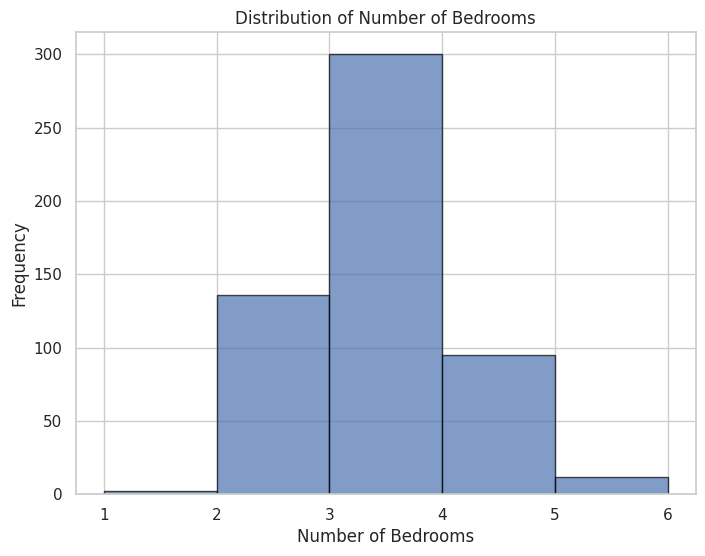

In [25]:
import matplotlib.pyplot as plt

# Histogram of bedrooms
plt.figure(figsize=(8, 6))
plt.hist(data['bedrooms'], bins=range(1, 7), edgecolor='black', alpha=0.7)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Bedrooms')
plt.xticks(range(1, 7))
plt.grid(True)
plt.show()


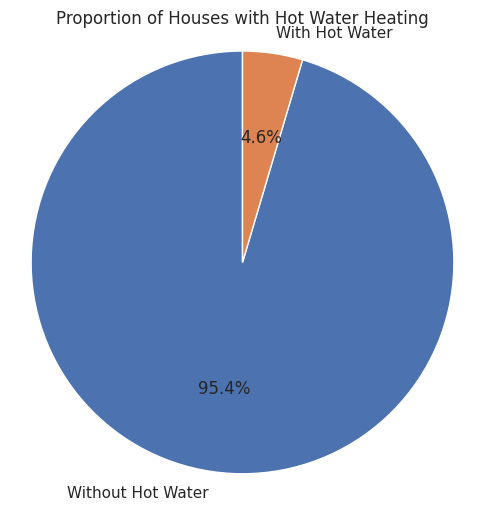

In [26]:
hotwater_proportion = data['hotwaterheating'].value_counts(normalize=True)

plt.figure(figsize=(6, 6))
plt.pie(hotwater_proportion, labels=['Without Hot Water', 'With Hot Water'], autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Houses with Hot Water Heating')
plt.axis('equal')
plt.show()


In [23]:
correlation_matrix = data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                     price      area  bedrooms  bathrooms   stories  mainroad  \
price             1.000000  0.535997  0.366494   0.517545  0.420712  0.296898   
area              0.535997  1.000000  0.151858   0.193820  0.083996  0.288874   
bedrooms          0.366494  0.151858  1.000000   0.373930  0.408564 -0.012033   
bathrooms         0.517545  0.193820  0.373930   1.000000  0.326165  0.042398   
stories           0.420712  0.083996  0.408564   0.326165  1.000000  0.121706   
mainroad          0.296898  0.288874 -0.012033   0.042398  0.121706  1.000000   
guestroom         0.255517  0.140297  0.080549   0.126469  0.043538  0.092337   
basement          0.187057  0.047417  0.097312   0.102106 -0.172394  0.044002   
hotwaterheating   0.093073 -0.009229  0.046049   0.067159  0.018847 -0.011781   
airconditioning   0.452954  0.222393  0.160603   0.186915  0.293602  0.105423   
parking           0.384394  0.352980  0.139270   0.177496  0.045547  0.204433   
furnishi

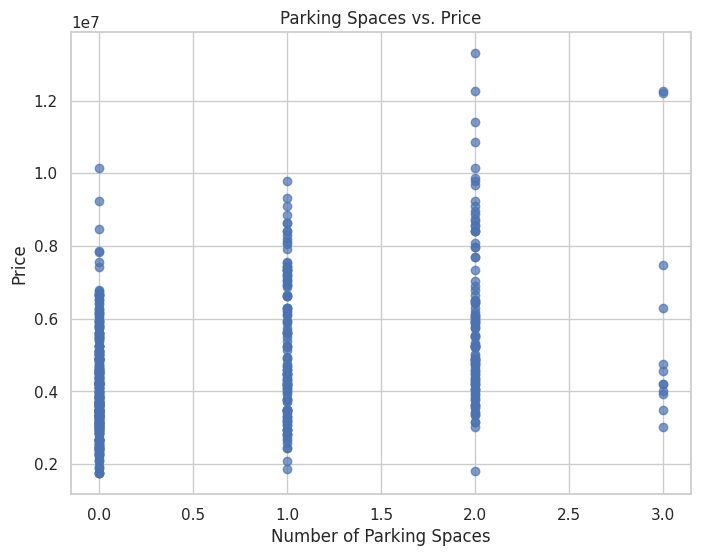

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(data['parking'], data['price'], alpha=0.7)
plt.xlabel('Number of Parking Spaces')
plt.ylabel('Price')
plt.title('Parking Spaces vs. Price')
plt.grid(True)
plt.show()


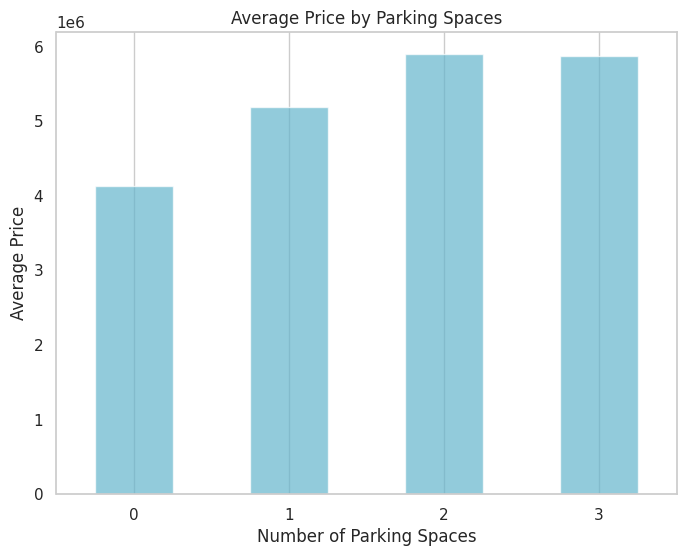

In [29]:
avg_price_by_parking = data.groupby('parking')['price'].mean()

plt.figure(figsize=(8, 6))
avg_price_by_parking.plot(kind='bar', color='c', alpha=0.7)
plt.xlabel('Number of Parking Spaces')
plt.ylabel('Average Price')
plt.title('Average Price by Parking Spaces')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


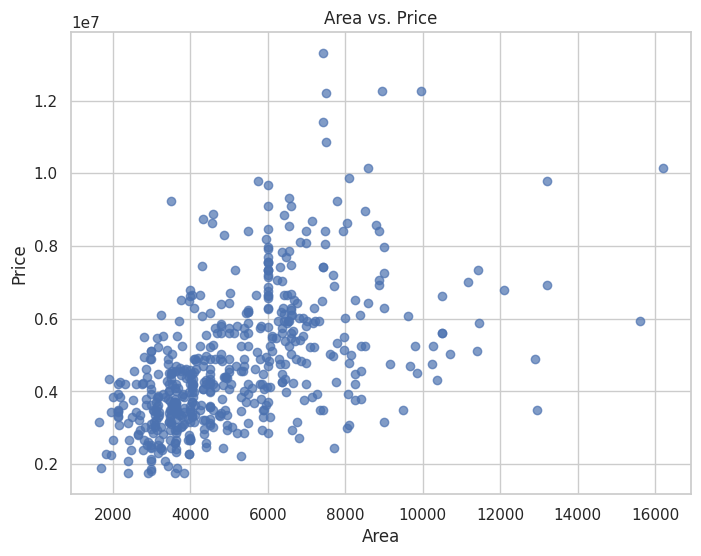

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(data['area'], data['price'], alpha=0.7)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs. Price')
plt.grid(True)
plt.show()


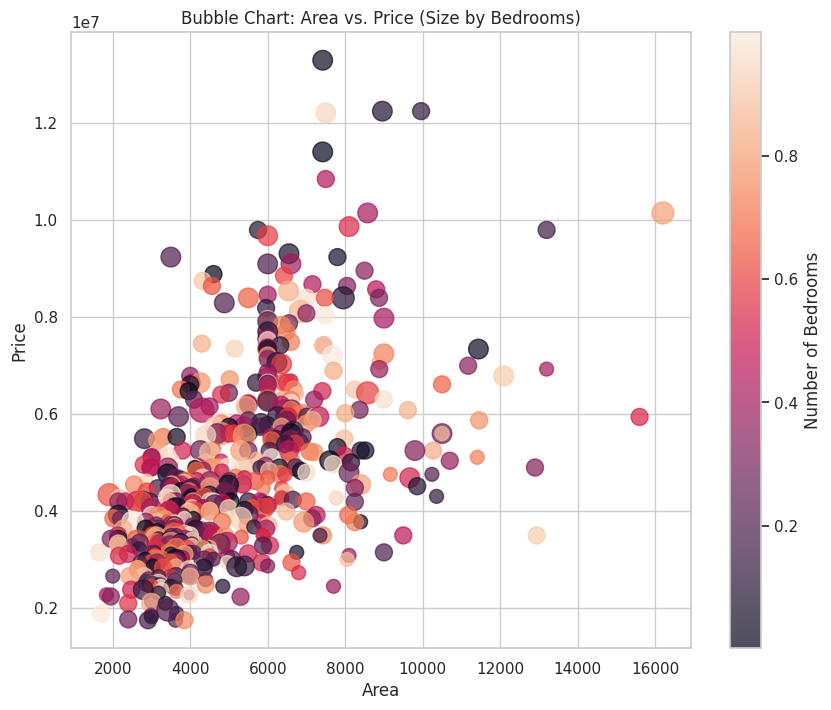

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random colors for bubbles
colors = np.random.rand(len(data))

plt.figure(figsize=(10, 8))
plt.scatter(data['area'], data['price'], s=data['bedrooms'] * 50, c=colors, alpha=0.7)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Bubble Chart: Area vs. Price (Size by Bedrooms)')
plt.colorbar(label='Number of Bedrooms')
plt.grid(True)
plt.show()


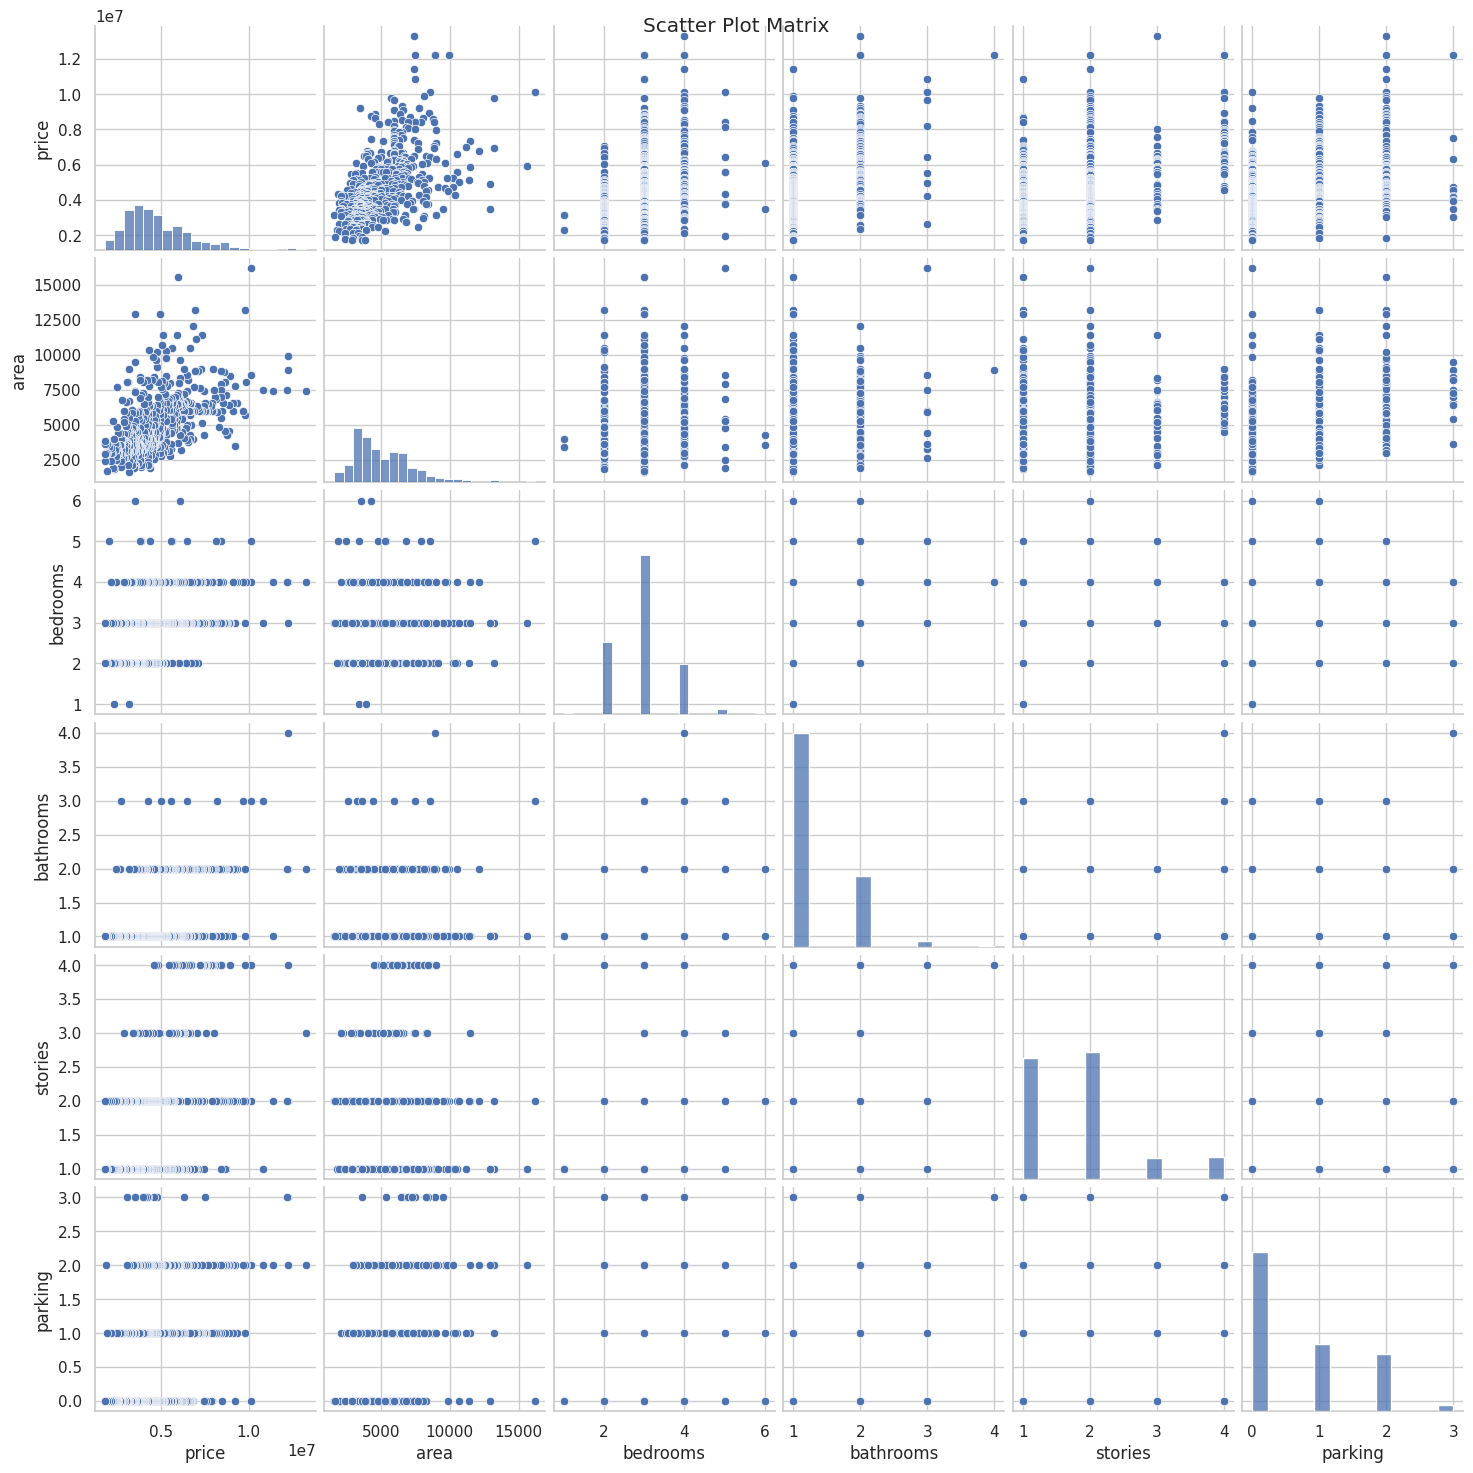

In [32]:
import seaborn as sns

num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
sns.pairplot(data[num_vars])
plt.suptitle("Scatter Plot Matrix")
plt.show()


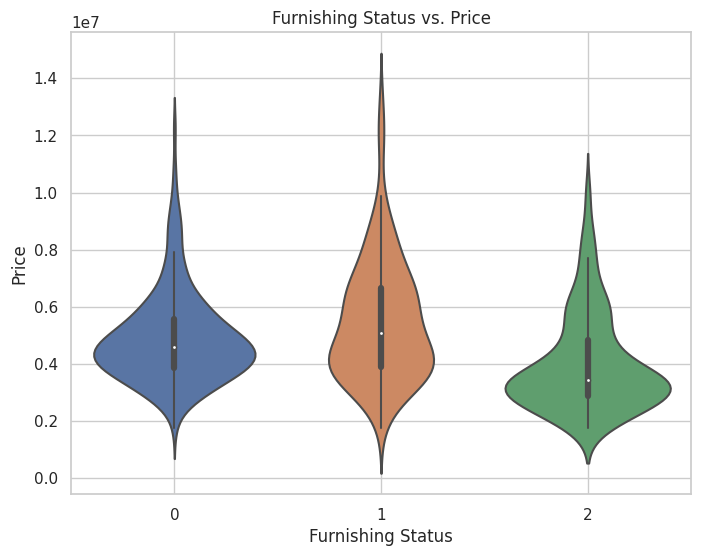

In [34]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='furnishingstatus', y='price', data=data)
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.title('Furnishing Status vs. Price')
plt.grid(True)
plt.show()


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separate features and target variable
# Split the dataset into training and testing sets
X = data.drop("price", axis=1)
y = data['price']/10000000
  # divinding the price for normalization

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate and print metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.018367202350575186
R-squared: 0.6366218796978218


In [45]:
import numpy as np

mse = 1836720235057.517

rmse = np.sqrt(mse)

print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 1355256.5200202938


In [46]:
lr = LinearRegression()

lr.fit(X_train,y_train)

pred_train= lr.predict(X_train)
rmse_train_lr=np.sqrt(mean_squared_error(y_train,pred_train))
print('RMSE of train data',rmse_train_lr)

pred = lr.predict(X_test)
rmse_test_lr = np.sqrt(mean_squared_error(y_test,pred))
print('RMSE of test data',rmse_test_lr)

RMSE of train data 0.1021839259522754
RMSE of test data 0.13552565200202943


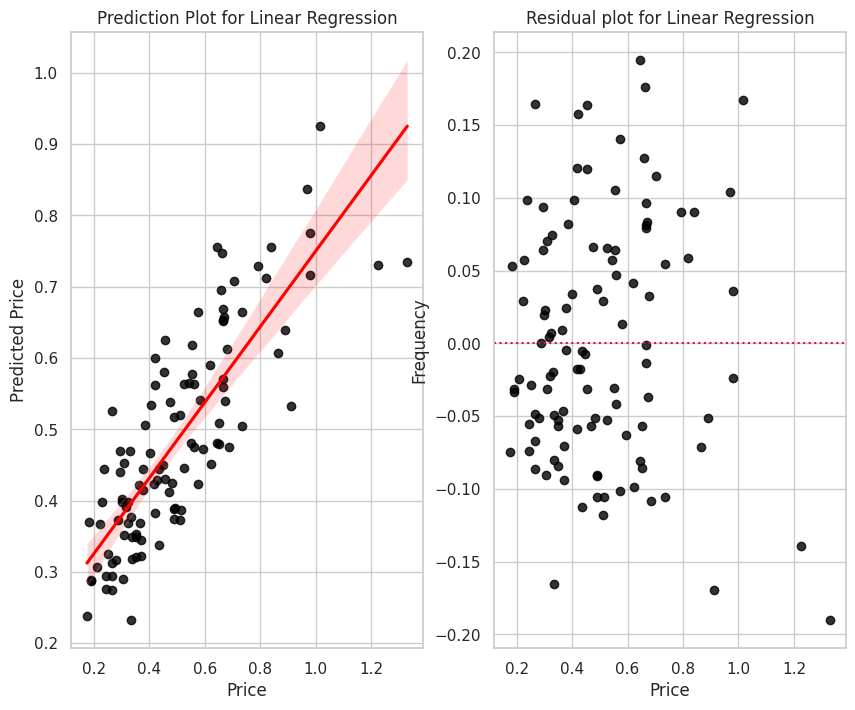

In [47]:
plt.figure(figsize=(10,8))
# Prediction plot
ax1 = plt.subplot(1,2,1)
sns.regplot(data=data,x=y_test,y=pred ,scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.title('Prediction Plot for Linear Regression')
plt.xlabel('Price')
plt.ylabel('Predicted Price')

#Residual plot
ax2 = plt.subplot(1,2,2)
ax=sns.residplot(data= y,x=y_test,y=pred,color='black')
ax.lines[0].set_color('crimson')
plt.title('Residual plot for Linear Regression')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()